In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from pgmpy.estimators import PC
from abbeyFunctions import graph_DAG
from abiFunctions import analyze_wls_pooled_models, wls_pooled_model_analysis
import pingouin

Import dataframes for plotting the full DAGs

In [2]:
diff_nominal = pd.read_csv('diff_nominal.csv')

diff_nominal.drop(columns=['Unnamed: 0'], inplace=True)

rates_nominal = pd.read_csv('rates_nominal.csv')

rates_nominal.drop(columns=['Unnamed: 0'], inplace=True)

log_nominal = pd.read_csv('log_nominal_data.csv')

In [3]:
diff_nominal

,FIPS,TimePeriod,Agri,Mini,Util,M4,M4I,unem,EFW
0,1001.0,2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1001.0,2002,NaN,NaN,NaN,NaN,-0.004895,0.669231,0.01
2,1001.0,2003,1.011185,0.610578,-0.767498,-0.006913,0.001531,0.192308,0.02
3,1001.0,2004,-0.570860,0.279452,0.436969,0.005551,0.011944,-0.284615,0.06
4,1001.0,2005,-0.053545,-0.231773,-0.744634,0.001974,0.011496,-0.930769,-0.12
...,...,...,...,...,...,...,...,...,...
61715,56045.0,2016,0.092303,-0.255754,-0.315557,-0.004745,0.001701,1.646154,0.01
61716,56045.0,2017,0.570072,0.009392,0.167250,-0.000308,0.003731,-0.923077,0.09
61717,56045.0,2018,-0.182600,0.216190,0.091809,0.009628,0.001597,-0.546154,-0.02
61718,56045.0,2019,-0.694689,0.002888,0.130280,0.155660,-0.006400,-0.546154,-0.05


Creating a dictionary to store the various combinations fo the dataframes for the DAGs

In [4]:
nominal_differenced_rates_with_all_variables = diff_nominal.dropna().set_index(['FIPS', 'TimePeriod'])

nominal_rates_with_all_variables = rates_nominal.dropna().set_index(['FIPS', 'TimePeriod'])

nominal_log_with_all_variables = log_nominal.dropna().set_index(['FIPS', 'TimePeriod'])

# Create a dictionary to store the DataFrames
full_DAG_dict = {}

full_DAG_dict['Nominal log (All variables)'] = nominal_log_with_all_variables

full_DAG_dict['Nominal log (without Monetary)'] = nominal_log_with_all_variables.drop(columns=['M4', 'M4I'])

full_DAG_dict['Nominal log (without unem)'] = nominal_log_with_all_variables.drop(columns=['unem'])

full_DAG_dict['Nominal rates (All variables)'] = nominal_rates_with_all_variables

full_DAG_dict['Nominal rates (without Monetary)'] = nominal_rates_with_all_variables.drop(columns=['M4', 'M4I'])

full_DAG_dict['Nominal rates (without unem)'] = nominal_rates_with_all_variables.drop(columns=['unem'])

full_DAG_dict['Nominal diff rates (All variables)'] = nominal_differenced_rates_with_all_variables

full_DAG_dict['Nominal diff rates (without Monetary)'] = nominal_differenced_rates_with_all_variables.drop(columns=['M4', 'M4I'])

full_DAG_dict['Nominal diff rates (without unem)'] = nominal_differenced_rates_with_all_variables.drop(columns=['unem'])

Here we plot the DAGs

  0%|          | 0/4 [00:00<?, ?it/s]

INFO:pgmpy:Reached maximum number of allowed conditional variables. Exiting


keep control: Mini
keep control: M4
('unem', 'Agri') ['Mini', 'M4']
('Agri', 'M4I') []
keep control: M4
('Agri', 'Util') ['M4']
keep control: unem
keep control: M4
('Mini', 'Agri') ['unem', 'M4']
('M4', 'unem') []
keep control: Mini
keep control: unem
('M4', 'Agri') ['Mini', 'unem']
keep control: Agri
('M4', 'Util') ['Agri']


  0%|          | 0/2 [00:00<?, ?it/s]

INFO:pgmpy:Reached maximum number of allowed conditional variables. Exiting


keep control: Agri
keep control: Util
('Mini', 'unem') ['Agri', 'Util']
keep control: unem
keep control: Util
('Mini', 'Agri') ['unem', 'Util']
keep control: unem
keep control: Agri
('Mini', 'Util') ['unem', 'Agri']
keep control: Mini
keep control: Util
('unem', 'Agri') ['Mini', 'Util']
keep control: Mini
keep control: Agri
('unem', 'Util') ['Mini', 'Agri']
keep control: Agri
keep control: Util
('unem', 'Mini') ['Agri', 'Util']
keep control: Mini
keep control: Util
('Agri', 'unem') ['Mini', 'Util']
keep control: Mini
keep control: unem
('Agri', 'Util') ['Mini', 'unem']
keep control: unem
keep control: Util
('Agri', 'Mini') ['unem', 'Util']
keep control: Mini
keep control: Agri
('Util', 'unem') ['Mini', 'Agri']
keep control: unem
keep control: Agri
('Util', 'Mini') ['unem', 'Agri']
keep control: Mini
keep control: unem
('Util', 'Agri') ['Mini', 'unem']


  0%|          | 0/3 [00:00<?, ?it/s]

INFO:pgmpy:Reached maximum number of allowed conditional variables. Exiting


('Agri', 'M4I') []
keep control: M4
('Agri', 'Util') ['M4']
('M4I', 'Mini') []
keep control: M4
('Mini', 'Agri') ['M4']
keep control: Mini
('M4', 'Agri') ['Mini']
keep control: Agri
('M4', 'Util') ['Agri']


  0%|          | 0/5 [00:00<?, ?it/s]

keep control: M4
('Mini', 'unem') ['M4']
keep control: unem
keep control: M4I
('Mini', 'EFW') ['unem', 'M4I']
keep control: Mini
keep control: M4I
('unem', 'EFW') ['Mini', 'M4I']
('unem', 'M4I') []
keep control: M4I
('Util', 'M4') ['M4I']
keep control: Mini
('M4', 'unem') ['Mini']
keep control: Util
('M4I', 'M4') ['Util']
('M4I', 'Mini') []
keep control: unem
keep control: Mini
('M4I', 'EFW') ['unem', 'Mini']


  0%|          | 0/3 [00:00<?, ?it/s]

INFO:pgmpy:Reached maximum number of allowed conditional variables. Exiting


keep control: Util
keep control: EFW
('Mini', 'unem') ['Util', 'EFW']
('Mini', 'EFW') []
keep control: Mini
keep control: EFW
('Util', 'unem') ['Mini', 'EFW']
keep control: Mini
keep control: Util
('EFW', 'unem') ['Mini', 'Util']
('EFW', 'Mini') []


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:pgmpy:Reached maximum number of allowed conditional variables. Exiting


keep control: M4I
('Util', 'M4') ['M4I']
keep control: Mini
keep control: EFW
('Util', 'M4I') ['Mini', 'EFW']
('Mini', 'EFW') []
keep control: Util
keep control: EFW
('Mini', 'M4I') ['Util', 'EFW']
keep control: Mini
keep control: Util
('EFW', 'M4I') ['Mini', 'Util']
keep control: Util
('M4I', 'M4') ['Util']


  0%|          | 0/5 [00:00<?, ?it/s]

keep control: EFW
keep control: M4
('Mini', 'unem') ['EFW', 'M4']
keep control: unem
('Mini', 'M4I') ['unem']
keep control: Mini
('unem', 'M4I') ['Mini']
keep control: Mini
keep control: M4
('EFW', 'unem') ['Mini', 'M4']
keep control: EFW
keep control: Mini
('M4', 'unem') ['EFW', 'Mini']
keep control: Util
('M4', 'EFW') ['Util']
keep control: M4
('Util', 'EFW') ['M4']
('Agri', 'M4') []


  0%|          | 0/3 [00:00<?, ?it/s]

INFO:pgmpy:Reached maximum number of allowed conditional variables. Exiting


keep control: Agri
keep control: EFW
('Mini', 'unem') ['Agri', 'EFW']
keep control: Mini
keep control: EFW
('Agri', 'unem') ['Mini', 'EFW']
keep control: Mini
keep control: Agri
('EFW', 'unem') ['Mini', 'Agri']
('EFW', 'Util') []
('Util', 'EFW') []


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:pgmpy:Reached maximum number of allowed conditional variables. Exiting


keep control: M4I
keep control: Agri
keep control: EFW
('Mini', 'M4') ['M4I', 'Agri', 'EFW']
('Mini', 'M4I') []
keep control: Mini
keep control: M4I
keep control: Agri
('EFW', 'M4') ['Mini', 'M4I', 'Agri']
('Util', 'EFW') []
keep control: Mini
keep control: M4I
keep control: EFW
('Agri', 'M4') ['Mini', 'M4I', 'EFW']
keep control: Mini
keep control: Agri
keep control: EFW
('M4I', 'M4') ['Mini', 'Agri', 'EFW']


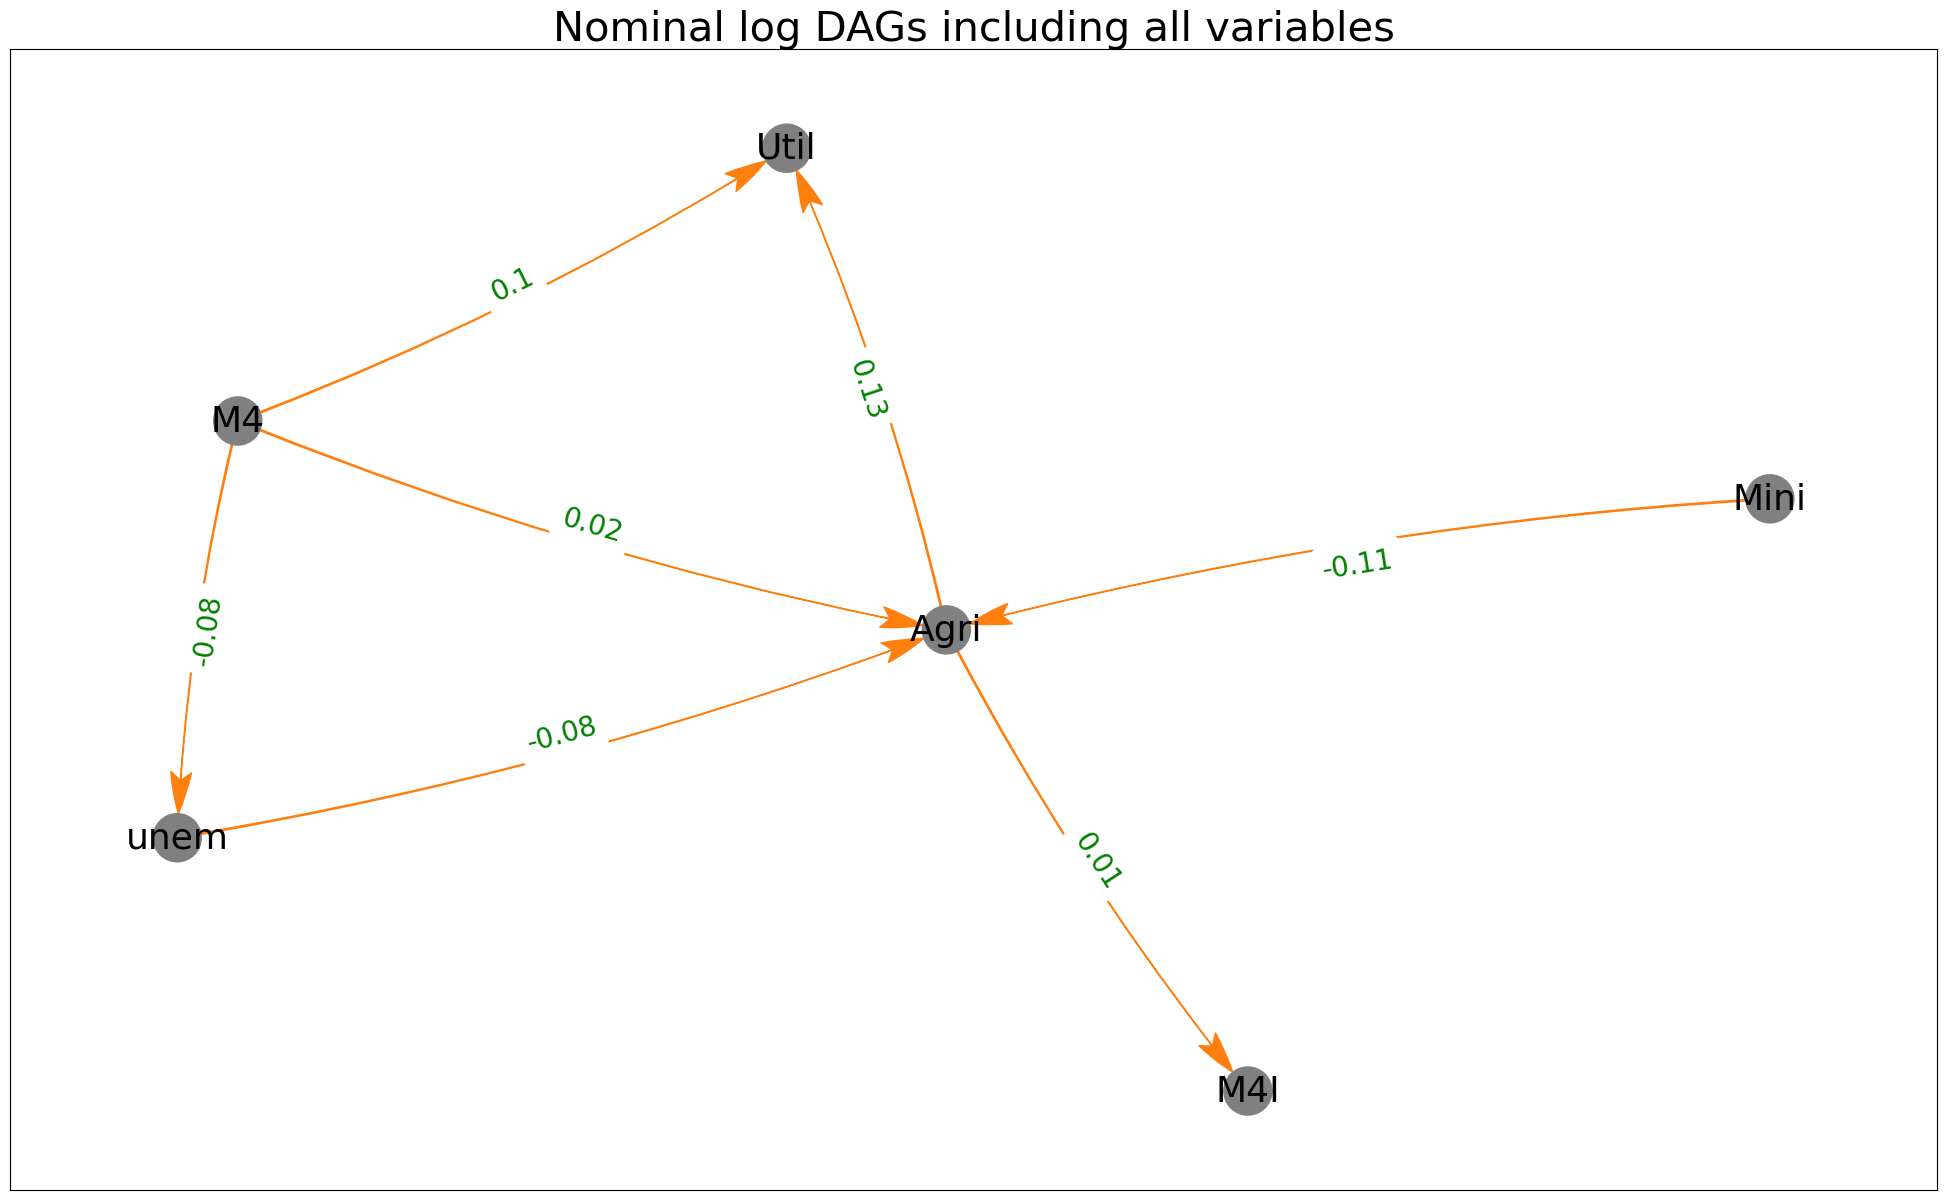

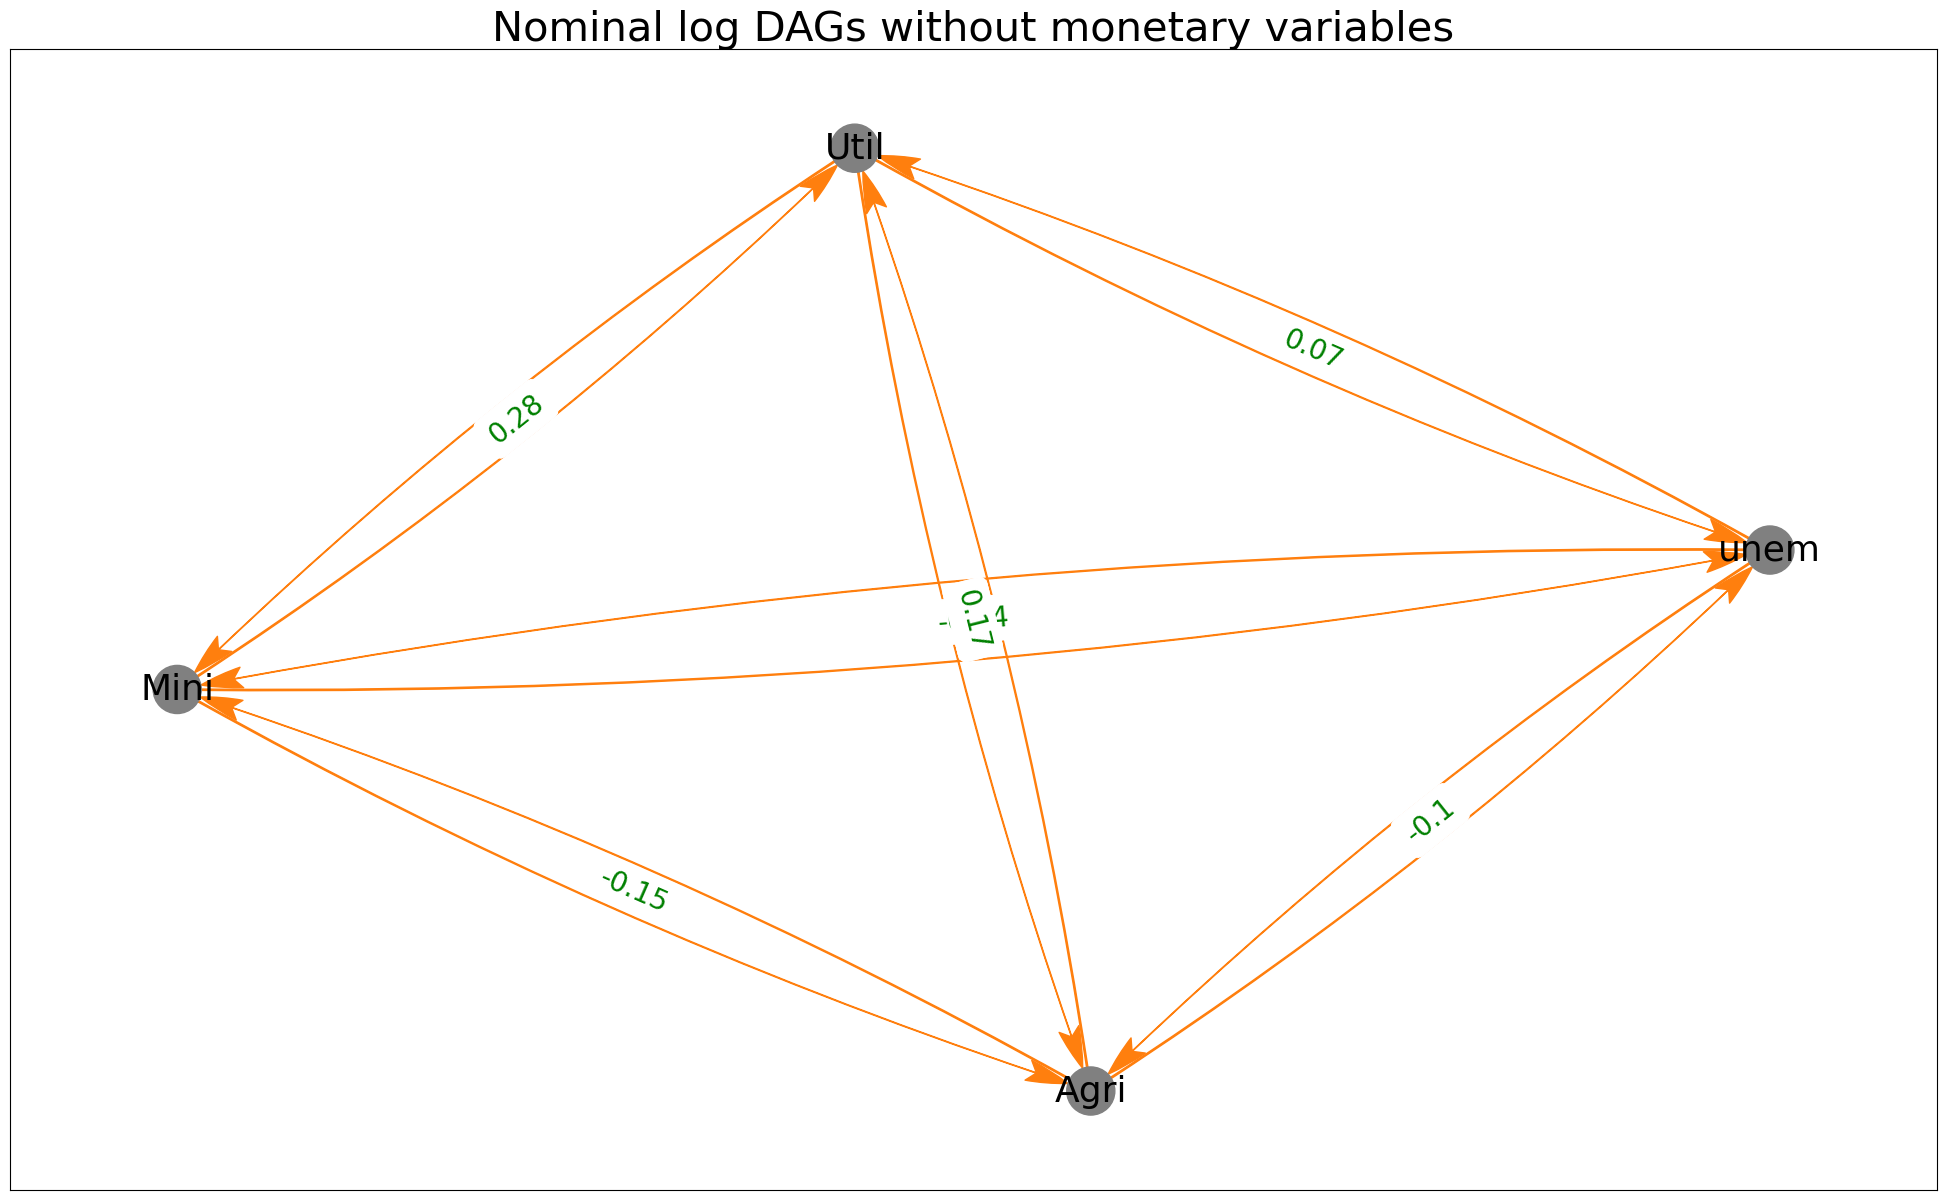

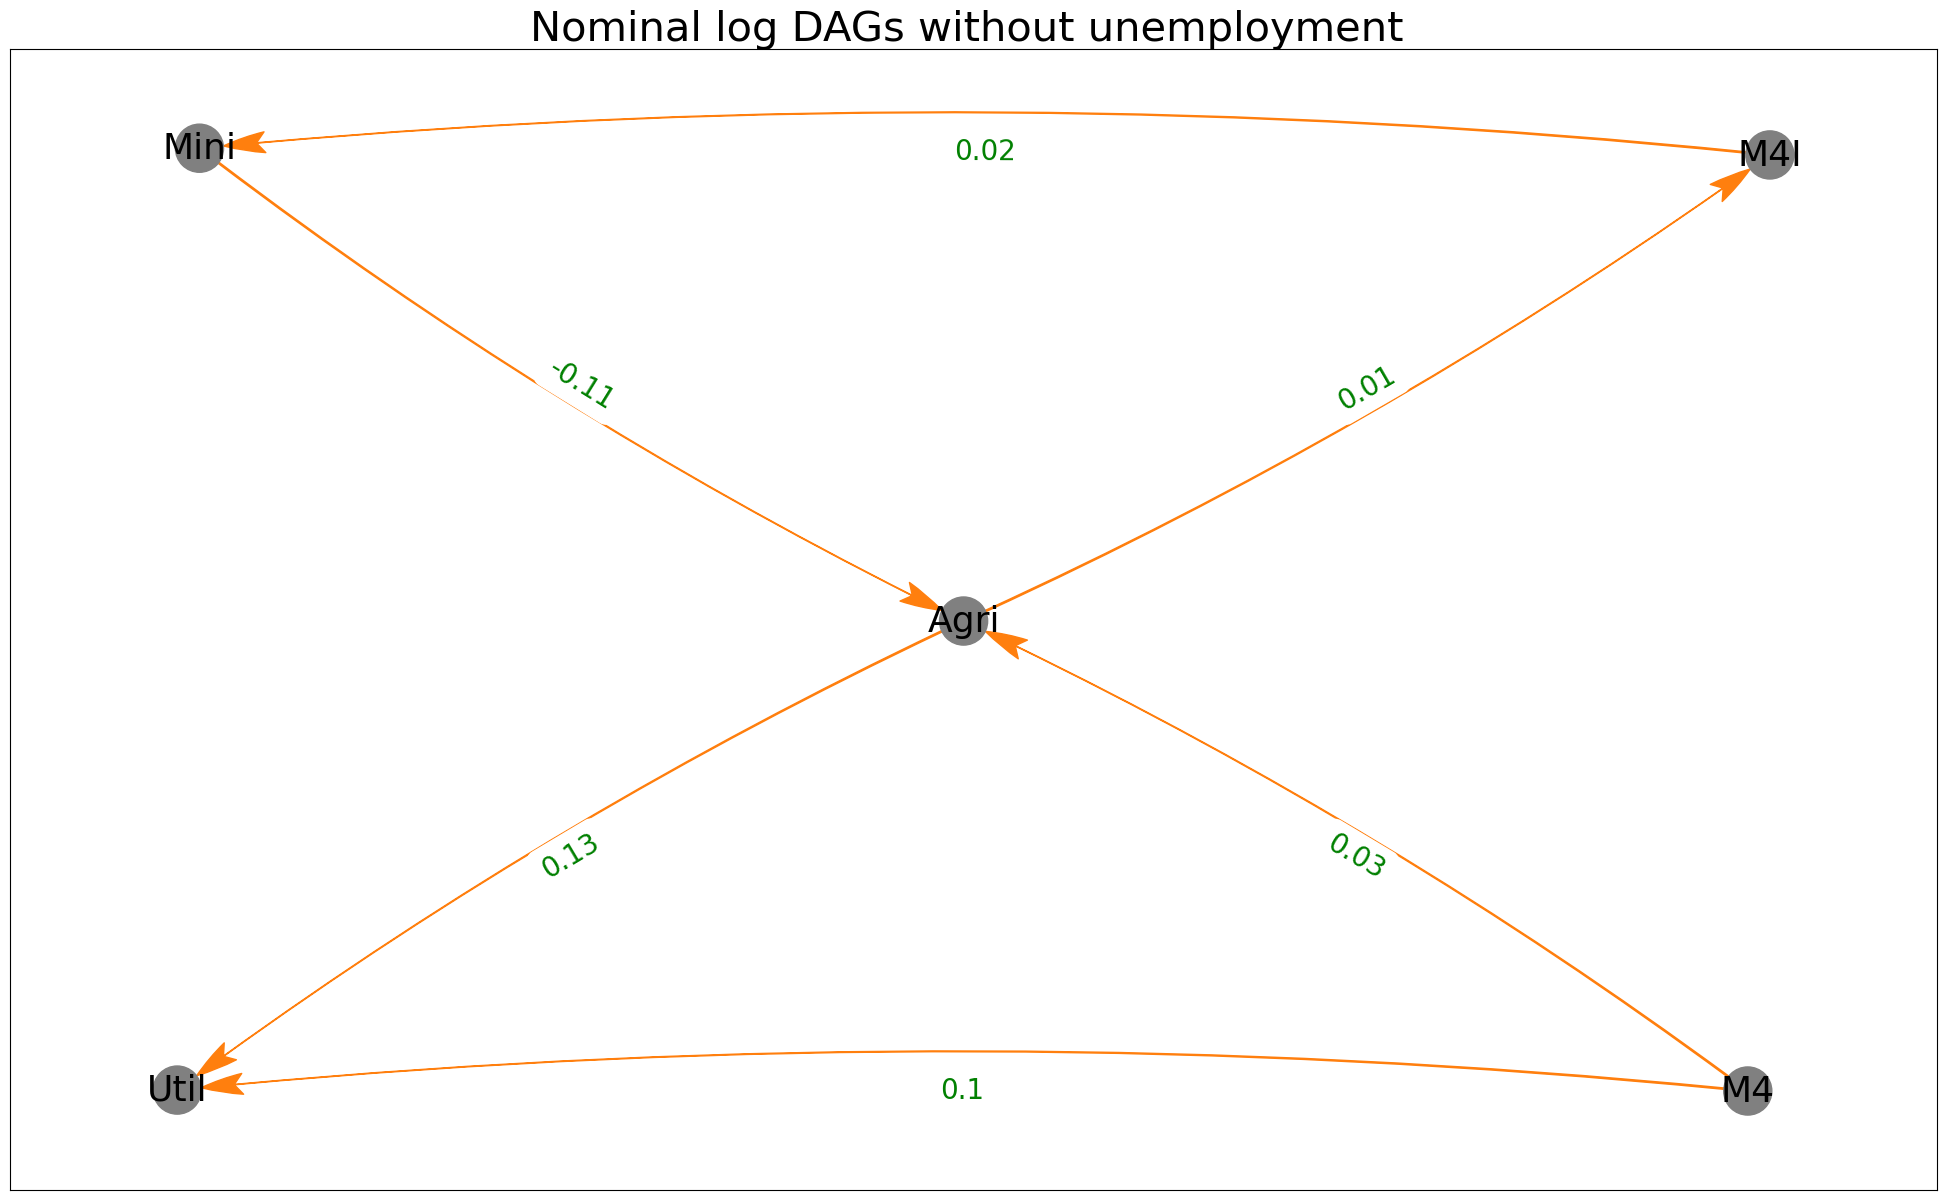

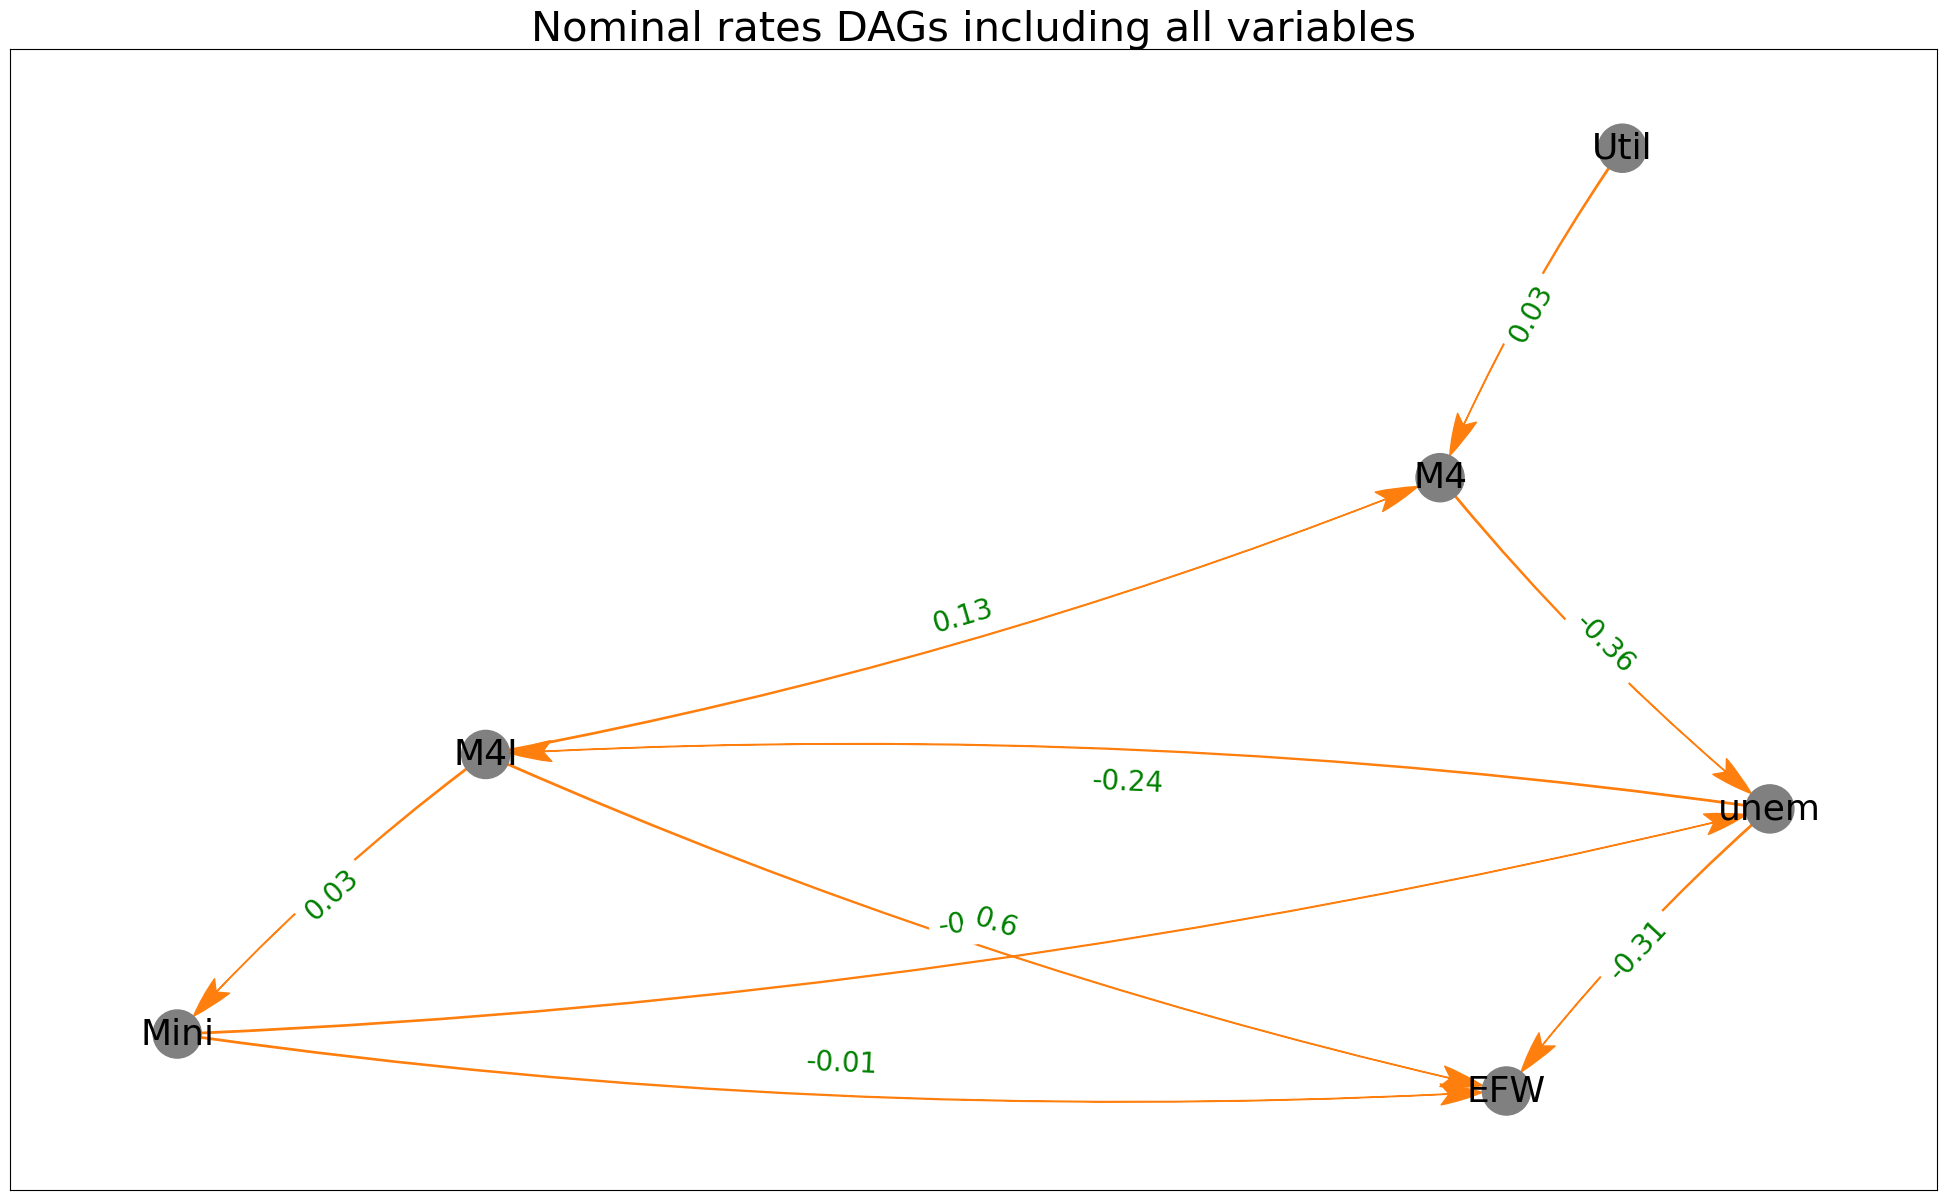

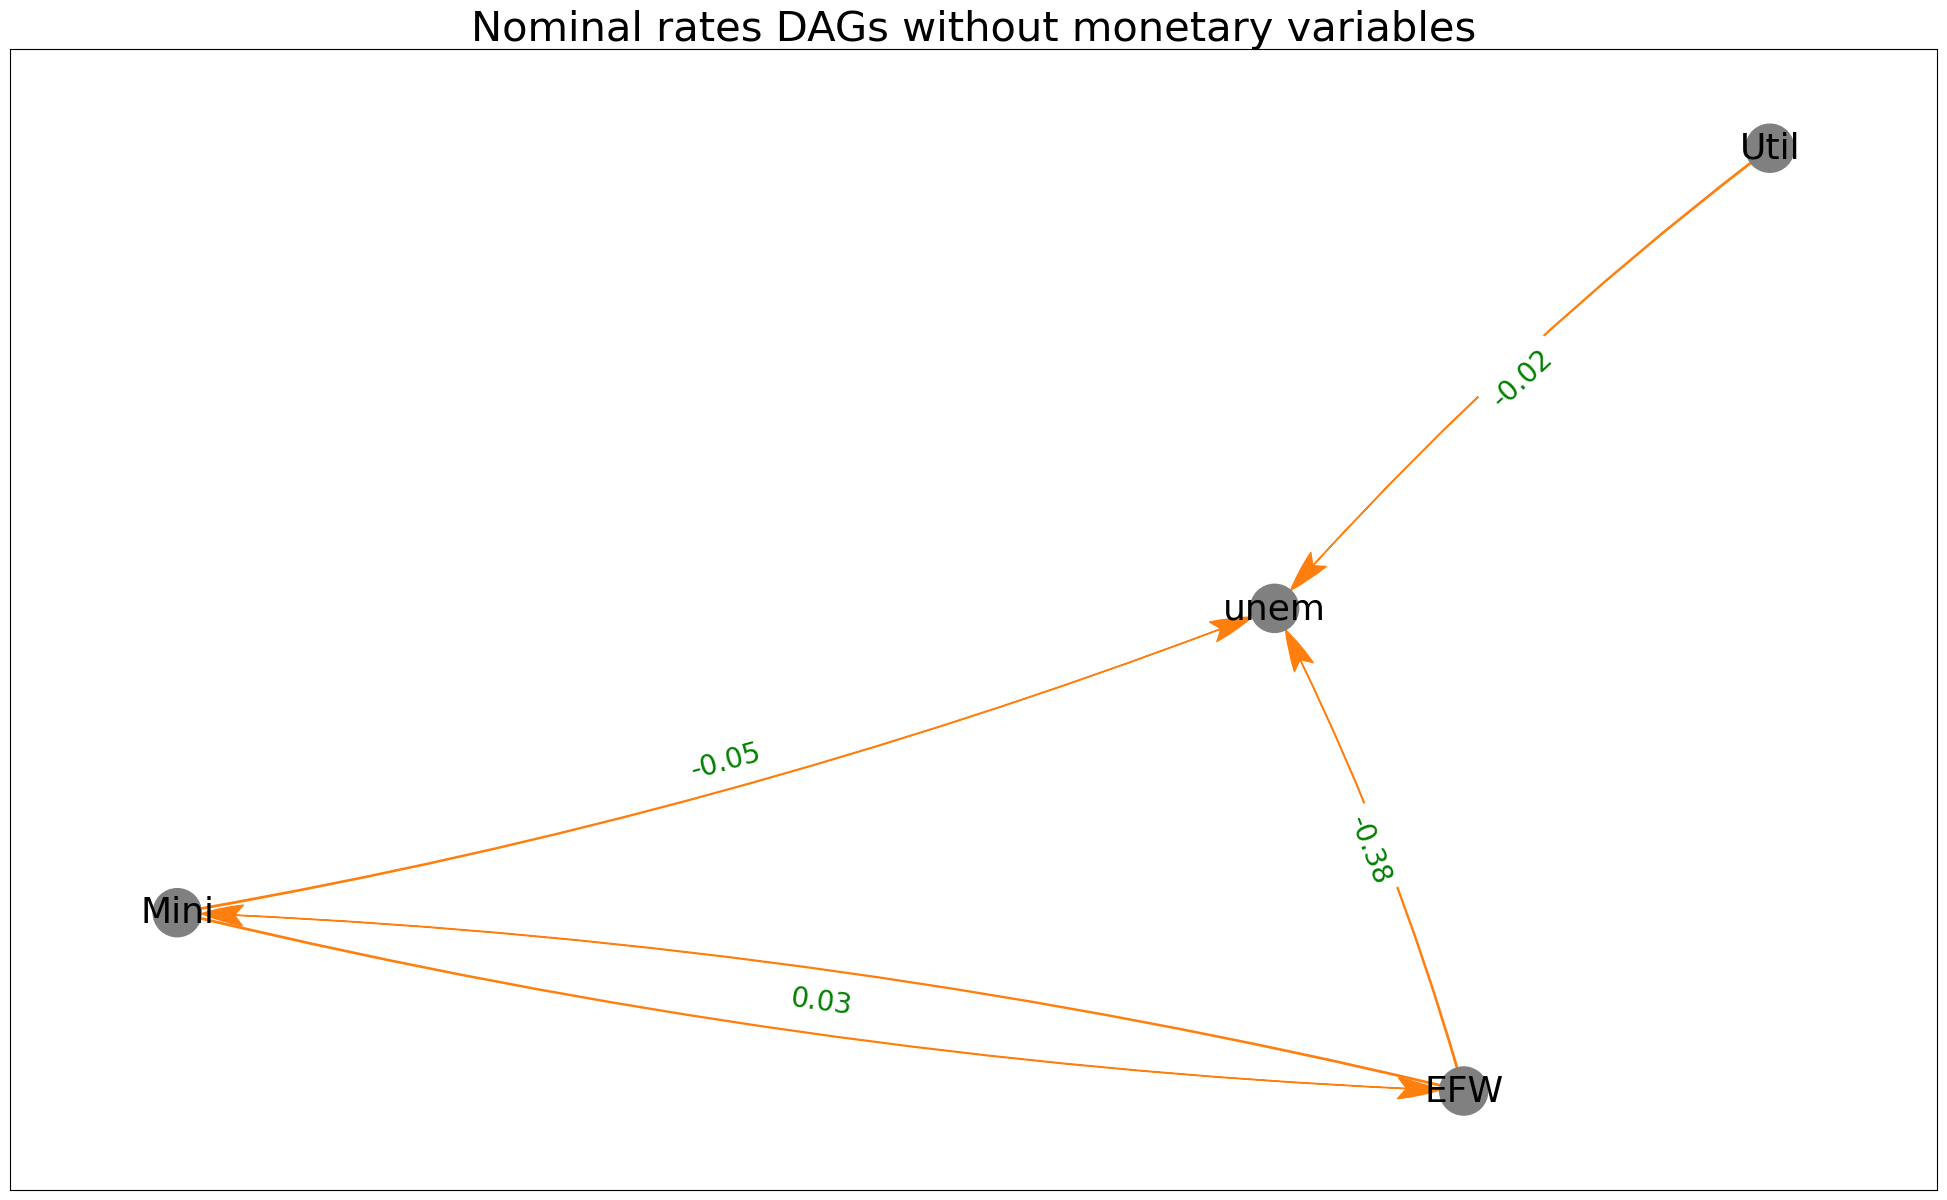

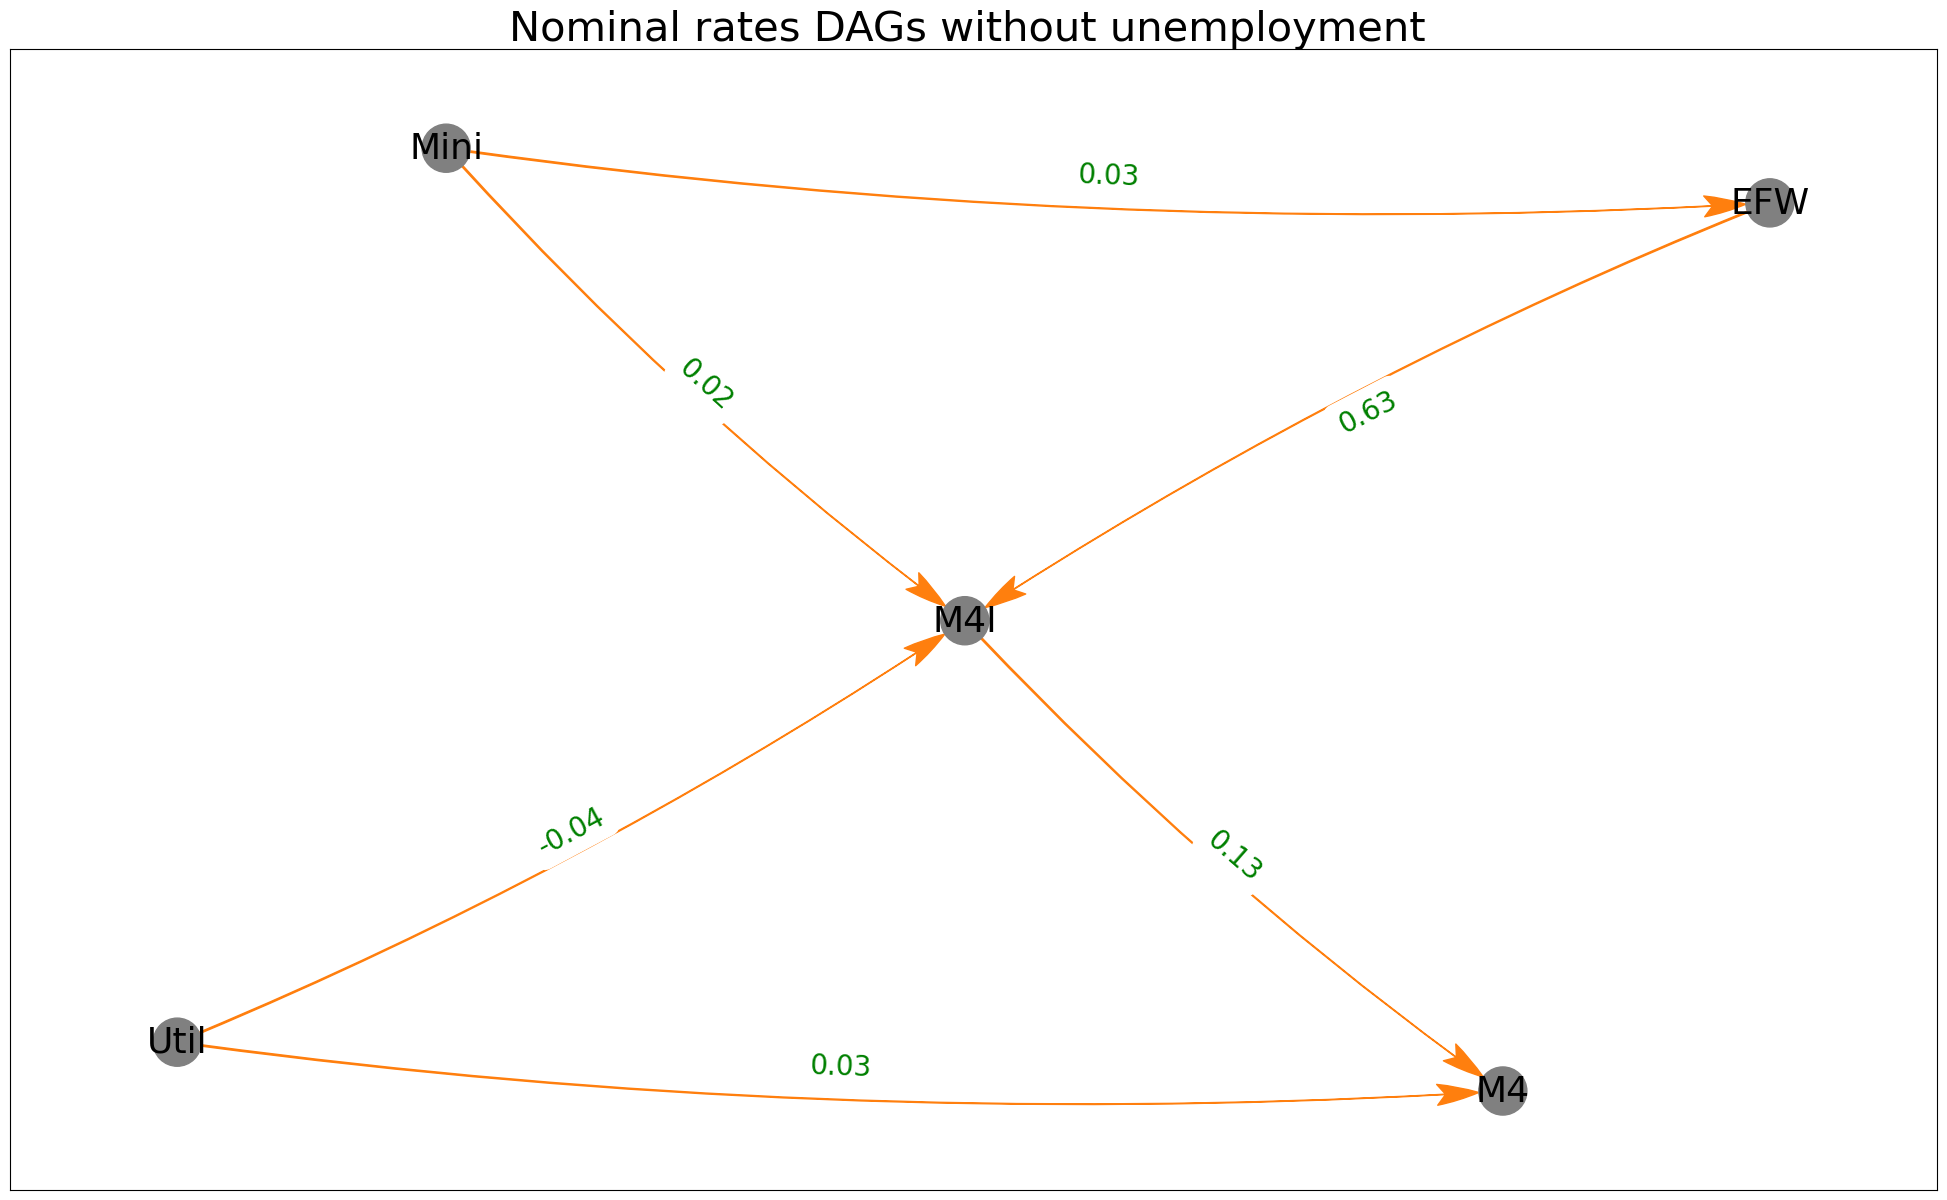

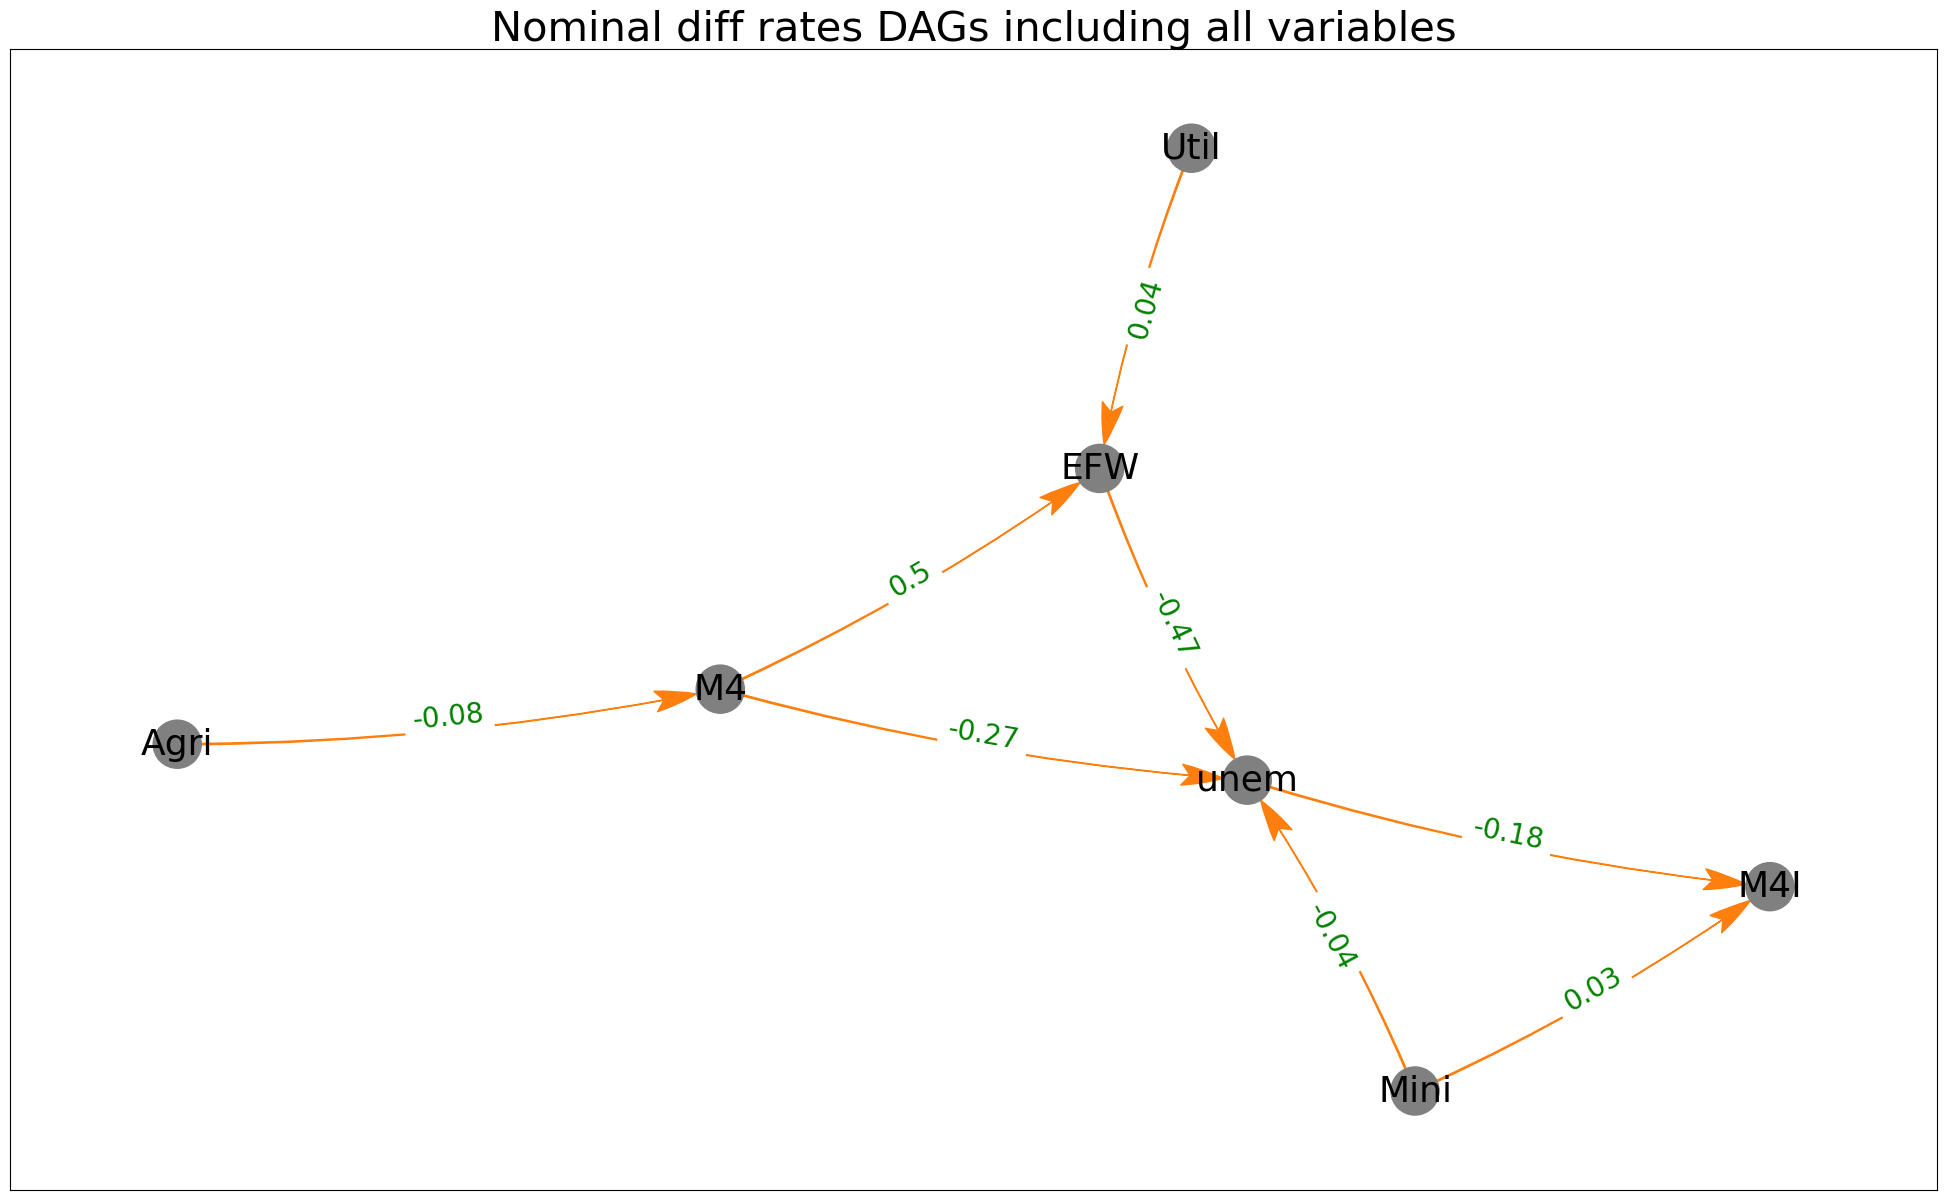

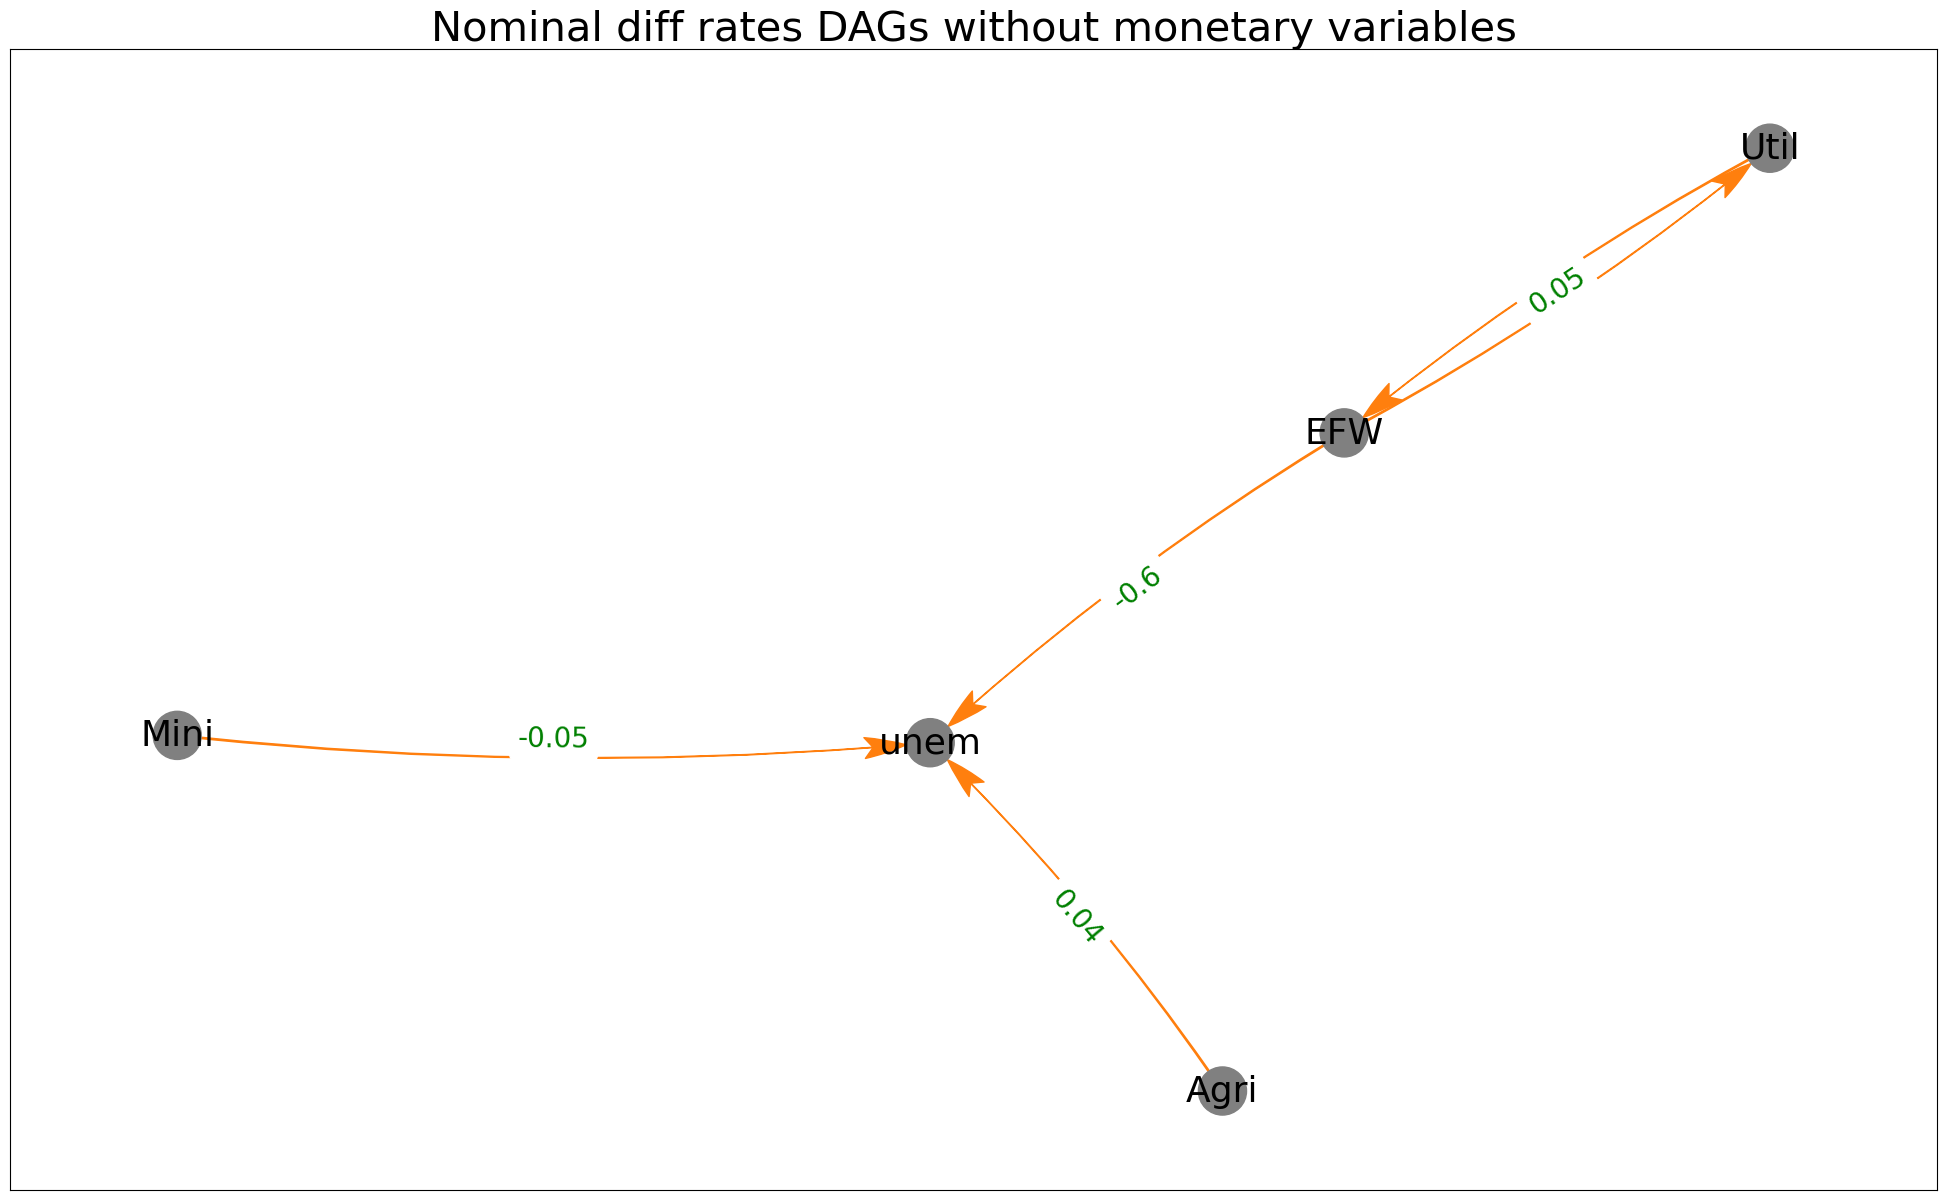

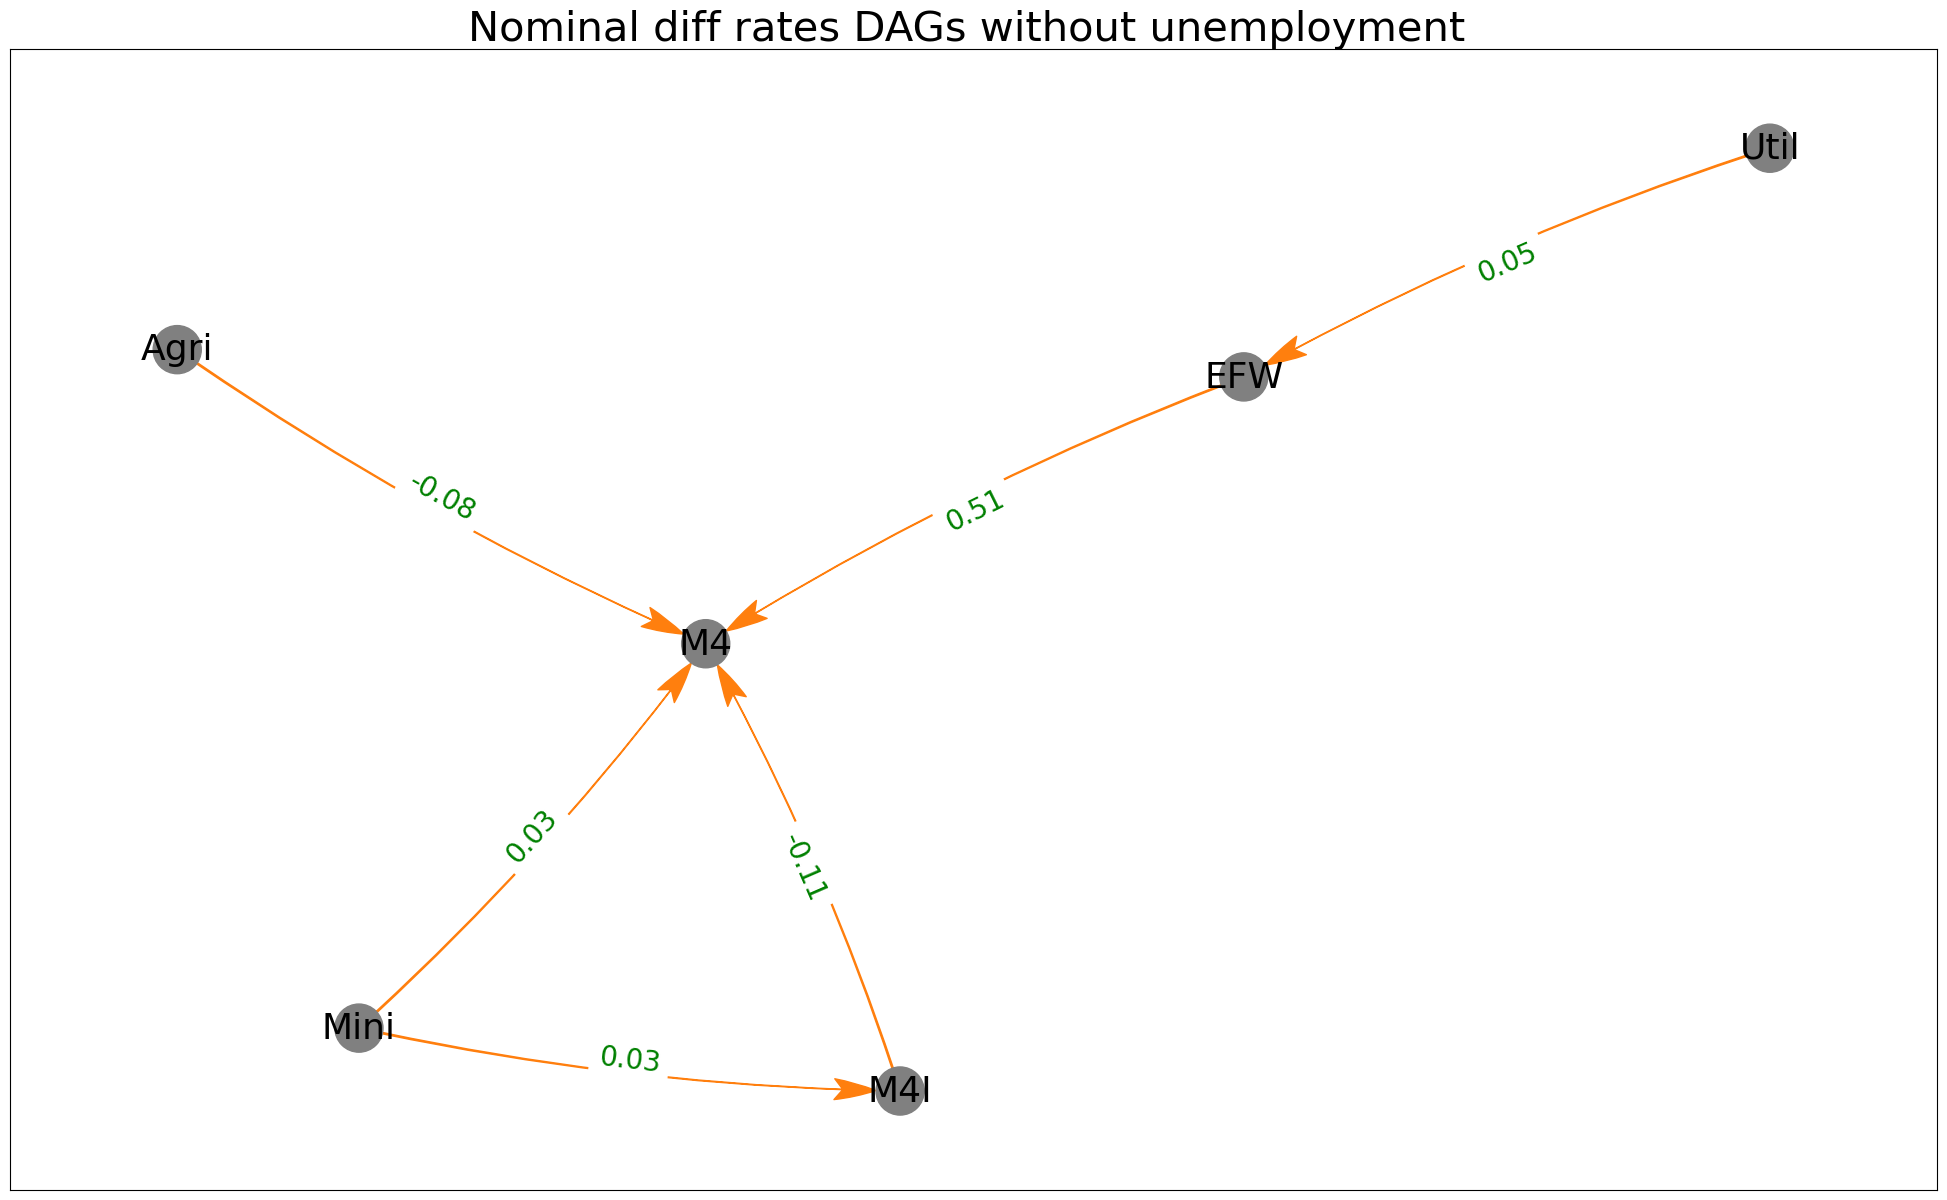

In [5]:
title = ['Nominal log DAGs including all variables',
        'Nominal log DAGs without monetary variables',
        'Nominal log DAGs without unemployment ',
        'Nominal rates DAGs including all variables',
        'Nominal rates DAGs without monetary variables',
        'Nominal rates DAGs without unemployment ',
        'Nominal diff rates DAGs including all variables',
        'Nominal diff rates DAGs without monetary variables',
        'Nominal diff rates DAGs without unemployment ']

# Plot DAGs for each dataframe
for i, key in enumerate(['Nominal log (All variables)',
                         'Nominal log (without Monetary)',
                         'Nominal log (without unem)',
                         'Nominal rates (All variables)',
                         'Nominal rates (without Monetary)',
                         'Nominal rates (without unem)',
                         'Nominal diff rates (All variables)',
                         'Nominal diff rates (without Monetary)',
                         'Nominal diff rates (without unem)']):
    plot_df = full_DAG_dict[key]
    c = PC(plot_df)
    max_cond_vars = len(plot_df.keys()) - 2
    model = c.estimate(return_type='pdag', variant='orig', significance_level=0.01,
                       max_cond_vars=max_cond_vars, ci_test='pearsonr')
    edges = model.edges

    # Plot the DAG
    graph_DAG(edges, plot_df, title=title[i])


Import dataframes for and fit the models (WLS and PooledOLS)

In [6]:
full_df_rates_cluster = pd.read_csv('full_df_rates_cluster.csv')
full_df_rates_cluster.drop(columns=['Unnamed: 0'], inplace=True)

full_df_diff_cluster = pd.read_csv('full_df_diff_cluster.csv')
full_df_diff_cluster.drop(columns=['Unnamed: 0'], inplace=True)

full_df_log_cluster = pd.read_csv('full_df_log_cluster.csv')
full_df_log_cluster.drop(columns=['Unnamed: 0'], inplace=True)

Here we use a function to fit the models and compare their results side by side.

In [7]:
# Convert boolean columns to integer columns
def convert_bool_to_int(df):
    for col in df.select_dtypes(include='bool').columns:
        df[col] = df[col].astype(int)
    return df

data_cluster_dict = {
    'Nominal rates with clusters': convert_bool_to_int(pd.get_dummies(full_df_rates_cluster, columns=['clusters'], drop_first=True)),
    'Nominal diff rates with clusters': convert_bool_to_int(pd.get_dummies(full_df_diff_cluster, columns=['clusters'], drop_first=True)),
    'Nominal log with clusters': convert_bool_to_int(pd.get_dummies(full_df_log_cluster, columns=['clusters'], drop_first=True))
}


In [8]:
result_df = analyze_wls_pooled_models(data_cluster_dict, 
                                      dependent_var='unem', 
                                      k=5, shuffle=True, random_state=42, check_rank=False)

# Display the result DataFrame
# print("\nResult DataFrame:")
display(result_df)


,Nominal rates with clusters - True - WLS,Nominal rates with clusters - True - PooledOLS,Nominal rates with clusters - False - WLS,Nominal rates with clusters - False - PooledOLS,Nominal diff rates with clusters - True - WLS,Nominal diff rates with clusters - True - PooledOLS,Nominal diff rates with clusters - False - WLS,Nominal diff rates with clusters - False - PooledOLS,Nominal log with clusters - True - WLS,Nominal log with clusters - True - PooledOLS,Nominal log with clusters - False - WLS,Nominal log with clusters - False - PooledOLS
const,25.691615,35.029054,20.071526,45.242405,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Agri,-0.082801,0.011452,-0.181409,-0.018246,0.172864,0.019053,1.048451,0.018530,0.052245,0.178722,-0.056055,-0.091058
Mini,0.058230,-0.177923,-0.218307,-0.236142,0.031111,-0.052718,0.243855,-0.051087,0.100262,-0.007670,0.184707,-0.014811
Util,-0.279678,0.008524,-0.136971,-0.089520,-0.067051,0.020158,0.046970,0.020769,-0.025394,0.007878,0.102035,0.081134
M4,-9.527156,-16.654752,-10.387036,-16.287801,-1.094996,-7.042337,30.611430,-7.206821,0.180344,-0.210033,-0.615245,-0.016546
M4I,-6.435295,-17.062670,0.680408,-2.181111,-0.004080,-26.024472,0.213501,-25.994215,-12.216791,-71.911456,-10.463446,-71.205356
EFW,-2.337628,-3.342138,-1.810157,-4.720290,-3.609636,-6.264968,-23.600722,-6.142314,0.189199,0.598527,0.893668,0.869830
clusters_2.0,-1.148585,-1.673946,NaN,NaN,-0.903349,-0.054894,NaN,NaN,2.328846,1.871396,NaN,NaN
clusters_3.0,-2.375014,-3.140173,NaN,NaN,-0.112037,-0.078710,NaN,NaN,1.952846,3.052377,NaN,NaN
clusters_4.0,2.834840,2.692616,NaN,NaN,-0.369248,-0.095416,NaN,NaN,0.853658,1.280808,NaN,NaN


In [9]:
# Compare regressions without using k-fold

result_df = wls_pooled_model_analysis(data_cluster_dict, dependent_var='unem', random_state=42, check_rank=True)
display(result_df)


,Nominal rates with clusters - True - WLS,Nominal rates with clusters - True - PooledOLS,Nominal rates with clusters - False - WLS,Nominal rates with clusters - False - PooledOLS,Nominal diff rates with clusters - True - WLS,Nominal diff rates with clusters - True - PooledOLS,Nominal diff rates with clusters - False - WLS,Nominal diff rates with clusters - False - PooledOLS,Nominal log with clusters - True - WLS,Nominal log with clusters - True - PooledOLS,Nominal log with clusters - False - WLS,Nominal log with clusters - False - PooledOLS
const,26.212508,35.466592,20.222825,45.895798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Agri,-0.087723,0.022109,-0.185562,-0.008836,0.199329,0.018846,1.598333,0.018425,0.050031,0.190470,-0.056648,-0.083994
Mini,0.054880,-0.182294,-0.219240,-0.240452,0.012565,-0.055669,0.279197,-0.053641,0.101757,-0.006855,0.187528,-0.015185
Util,-0.284203,0.008667,-0.144792,-0.078380,-0.101747,0.025310,-0.059460,0.026343,-0.027315,0.009920,0.100941,0.080147
M4,-9.542041,-16.732653,-10.395132,-16.318828,-0.426177,-7.120343,52.681060,-7.293851,0.242598,-0.217903,-0.606619,-0.012881
M4I,-6.775937,-16.506905,0.635662,-0.920441,-0.012934,-25.835121,0.392035,-25.803457,-9.863347,-72.130864,-8.760129,-70.950233
EFW,-2.404065,-3.395469,-1.829023,-4.800148,-3.532582,-6.266001,-36.749870,-6.134397,0.134707,0.588206,0.884342,0.859670
clusters_2.0,-1.152076,-1.678883,NaN,NaN,-1.092908,-0.060121,NaN,NaN,2.360723,1.850405,NaN,NaN
clusters_3.0,-2.334427,-3.129976,NaN,NaN,-0.114674,-0.078511,NaN,NaN,1.908180,3.074319,NaN,NaN
clusters_4.0,2.857332,2.726683,NaN,NaN,-0.376749,-0.110270,NaN,NaN,0.854488,1.281482,NaN,NaN


Here we fit the regressions and report all the mse's from all the iterations

In [10]:
from abiFunctions import analyze_wls_pooled_models_all_mse

result_all = analyze_wls_pooled_models_all_mse(data_cluster_dict, dependent_var='unem', k=5, shuffle=True, random_state=42, check_rank=True, num_iterations=10)
display(result_all)


,Nominal rates with clusters - True - WLS,Nominal rates with clusters - True - PooledOLS,Nominal rates with clusters - False - WLS,Nominal rates with clusters - False - PooledOLS,Nominal diff rates with clusters - True - WLS,Nominal diff rates with clusters - True - PooledOLS,Nominal diff rates with clusters - False - WLS,Nominal diff rates with clusters - False - PooledOLS,Nominal log with clusters - True - WLS,Nominal log with clusters - True - PooledOLS,Nominal log with clusters - False - WLS,Nominal log with clusters - False - PooledOLS
const,25.691615,35.466311,20.071526,45.895681,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Agri,-0.082801,0.022149,-0.181409,-0.008771,0.172864,0.018842,1.048451,0.018418,0.052245,0.190495,-0.056055,-0.084007
Mini,0.058230,-0.182491,-0.218307,-0.240568,0.031111,-0.055732,0.243855,-0.053701,0.100262,-0.006851,0.184707,-0.015190
Util,-0.279678,0.008584,-0.136971,-0.078498,-0.067051,0.025297,0.046970,0.026338,-0.025394,0.009918,0.102035,0.080151
M4,-9.527156,-16.732825,-10.387036,-16.318785,-1.094996,-7.120943,30.611430,-7.294343,0.180344,-0.217880,-0.615245,-0.012842
...,...,...,...,...,...,...,...,...,...,...,...,...
MSE Fold 46,3.417207,2.807117,7.505098,5.310990,1.919634,1.153631,2.332098,1.157421,6.507100,5.545423,8.669374,6.540098
MSE Fold 47,3.318913,2.787432,7.193835,5.283886,1.421037,1.184429,1.360193,1.188428,6.481328,5.346206,8.161168,6.369254
MSE Fold 48,3.460527,2.826155,7.378567,5.305034,2.001833,1.183259,14.579590,1.184957,6.928492,5.563646,8.753408,6.635169
MSE Fold 49,3.218074,2.806378,7.192598,5.407831,1.931753,1.091745,14.682997,1.093210,7.273305,5.633582,8.969842,6.607410


Now we fit the regressions and report the results that have the least mse

In [11]:
from abiFunctions import analyze_wls_pooled_models_least_mse

result_least_mse = analyze_wls_pooled_models_least_mse(data_cluster_dict, dependent_var='unem', k=5, shuffle=True, random_state=42, check_rank=True, num_iterations=10)
display(result_least_mse)


,Nominal rates with clusters - True - WLS,Nominal rates with clusters - True - PooledOLS,Nominal rates with clusters - False - WLS,Nominal rates with clusters - False - PooledOLS,Nominal diff rates with clusters - True - WLS,Nominal diff rates with clusters - True - PooledOLS,Nominal diff rates with clusters - False - WLS,Nominal diff rates with clusters - False - PooledOLS,Nominal log with clusters - True - WLS,Nominal log with clusters - True - PooledOLS,Nominal log with clusters - False - WLS,Nominal log with clusters - False - PooledOLS
const,22.299315,35.635534,19.486365,45.871512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Agri,-0.186375,0.023675,-0.122257,-0.012790,-0.059771,0.016932,-0.213085,0.016082,0.082754,0.198507,-0.040996,-0.079844
Mini,0.067609,-0.193034,-0.195689,-0.252237,0.030755,-0.070856,0.110195,-0.068740,0.106906,-0.015746,0.185529,-0.017868
Util,-0.083656,0.003537,-0.227714,-0.062308,-0.027353,0.032960,0.045163,0.034492,-0.051953,0.012936,0.092291,0.080690
M4,-9.717794,-16.824249,-10.717898,-16.413851,-2.212860,-7.114548,-2.459084,-7.296923,0.379863,-0.247279,-0.468721,-0.046396
M4I,-12.558940,-15.636892,-3.872937,-0.623784,-0.012553,-25.358476,-0.017442,-25.324200,-9.657396,-72.889383,-7.134836,-71.895936
EFW,-1.886567,-3.416849,-1.727630,-4.796479,-5.456440,-6.266036,-7.615741,-6.127406,-0.002416,0.611587,0.759229,0.888853
clusters_2.0,-1.302110,-1.675068,NaN,NaN,-0.474203,-0.061754,NaN,NaN,2.463969,1.856199,NaN,NaN
clusters_3.0,-2.622474,-3.121945,NaN,NaN,-0.113676,-0.083923,NaN,NaN,1.871404,3.087054,NaN,NaN
clusters_4.0,2.776673,2.769345,NaN,NaN,-0.467846,-0.122570,NaN,NaN,0.850046,1.324768,NaN,NaN


## Using OLS inplace of pooledOLS

In [12]:
from abiFunctions import analyze_wls_ols_models_least_mse

dependent_var = 'unem'

# Analyze models
model_attributes = analyze_wls_ols_models_least_mse(data_cluster_dict, dependent_var, k=5, 
                                             shuffle=True, random_state=42, 
                                             num_iterations=10)

# Accessing results as a list
results_list = []
for attributes in model_attributes:
    results_list.append({
        'Dataset': attributes['Dataset'],
        'Clusters': attributes['Clusters'],
        'Model': attributes['Model'],
        'Beta Estimates': attributes['Beta Estimates'].values.tolist(),
        'Least MSE': attributes['Least MSE'],
        'R^2': attributes['R^2']
    })

result_df = pd.DataFrame()
for attributes in model_attributes:
    dataset_name = attributes['Dataset']
    clusters = attributes['Clusters']
    model_name = attributes['Model']
    beta_estimates = attributes['Beta Estimates']
    least_mse = attributes['Least MSE']
    r_squared = attributes['R^2']
    mse_series = pd.Series([r_squared, least_mse], index=["$R^2$", "Least MSE"])
    combined_series = pd.concat([beta_estimates, mse_series], axis=0)
    result_df = pd.concat([result_df, combined_series], axis=1)
    result_df.rename(columns={result_df.columns[-1]: f"{dataset_name} - {clusters} - {model_name}"}, inplace=True)

result_df


,Nominal rates with clusters - True - WLS,Nominal rates with clusters - True - OLS,Nominal rates with clusters - False - WLS,Nominal rates with clusters - False - OLS,Nominal diff rates with clusters - True - WLS,Nominal diff rates with clusters - True - OLS,Nominal diff rates with clusters - False - WLS,Nominal diff rates with clusters - False - OLS,Nominal log with clusters - True - WLS,Nominal log with clusters - True - OLS,Nominal log with clusters - False - WLS,Nominal log with clusters - False - OLS
const,22.299315,35.635534,19.486365,45.871512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Agri,-0.186375,0.023675,-0.122257,-0.012790,-0.059771,0.016932,-0.213085,0.016082,0.082754,0.198507,-0.040996,-0.079844
Mini,0.067609,-0.193034,-0.195689,-0.252237,0.030755,-0.070856,0.110195,-0.068740,0.106906,-0.015746,0.185529,-0.017868
Util,-0.083656,0.003537,-0.227714,-0.062308,-0.027353,0.032960,0.045163,0.034492,-0.051953,0.012936,0.092291,0.080690
M4,-9.717794,-16.824249,-10.717898,-16.413851,-2.212860,-7.114548,-2.459084,-7.296923,0.379863,-0.247279,-0.468721,-0.046396
M4I,-12.558940,-15.636892,-3.872937,-0.623784,-0.012553,-25.358476,-0.017442,-25.324200,-9.657396,-72.889383,-7.134836,-71.895936
EFW,-1.886567,-3.416849,-1.727630,-4.796479,-5.456440,-6.266036,-7.615741,-6.127406,-0.002416,0.611587,0.759229,0.888853
clusters_2.0,-1.302110,-1.675068,NaN,NaN,-0.474203,-0.061754,NaN,NaN,2.463969,1.856199,NaN,NaN
clusters_3.0,-2.622474,-3.121945,NaN,NaN,-0.113676,-0.083923,NaN,NaN,1.871404,3.087054,NaN,NaN
clusters_4.0,2.776673,2.769345,NaN,NaN,-0.467846,-0.122570,NaN,NaN,0.850046,1.324768,NaN,NaN


Now we create a dictionary to store the results for the regressions. This time we vary the k-folds and compare the results as k increases.

In [13]:
from abiFunctions import analyze_wls_ols_models_with_varying_folds

dependent_var = 'unem'

# Analyze models with varying number of folds
results_dict = analyze_wls_ols_models_with_varying_folds(data_cluster_dict, dependent_var, start_k=5, max_k=10, 
                                             shuffle=True, random_state=42, 
                                             num_iterations=10)


In [14]:
df_rates = results_dict['Nominal rates with clusters']

df_diff_rates = results_dict['Nominal diff rates with clusters']

df_log = results_dict['Nominal log with clusters']

Now we plot the results for ease of comparisons on bar charts.

In [15]:
from abiFunctions import plot_model_comparisons
# Plot for nominal rates with clusters
# plot_model_comparisons(results_dict['Nominal rates with clusters'], 'Nominal rates')

In [16]:
# Plot for nominal diff rates with clusters
# plot_model_comparisons(results_dict['Nominal diff rates with clusters'], 'Nominal diff rates')

## Using plotly to create dynamic line plots

In [17]:
from abiFunctions import plot_model_comparisons_with_dropdowns
fig = plot_model_comparisons_with_dropdowns(results_dict)
fig.write_html("model_comparisons_nominal_nominaldiff.html")

### wls and ols for all dataframes

In [18]:
from abiFunctions import wls_ols_with_varying_folds

dependent_var = 'unem'

# Analyze models with varying number of folds
wls_ols_dict = wls_ols_with_varying_folds(data_cluster_dict, dependent_var, start_k=5, max_k=10, 
                                             shuffle=True, random_state=42, 
                                             num_iterations=3)


## Updated OLS WLS model plots

In [19]:
from abiFunctions import plot_wls_ols_with_dropdowns

fig_wls_ols = plot_wls_ols_with_dropdowns(wls_ols_dict)
fig_wls_ols.write_html("wls_ols_model_comparisons.html")

## Investigating WLS regression and plots for different dataframes (Nominal rates and Nominal differenced rtates)

In [20]:
from abiFunctions import run_regression_combinations, plot_combined_results

# Example usage for multiple dataframes
df_rates = data_cluster_dict['Nominal rates with clusters']
dependent_var1 = 'unem'
independent_vars1 = ['Agri', 'Mini', 'Util', 'M4', 'M4I']
always_include1 = ['EFW', 'clusters_2.0', 'clusters_3.0', 'clusters_4.0']  # Example with specific cluster column
never_include1 = []

df_diff = data_cluster_dict['Nominal diff rates with clusters']
dependent_var2 = 'unem'
independent_vars2 = ['Agri', 'Mini', 'Util', 'M4', 'M4I']
always_include2 = ['EFW']
never_include2 = ['clusters_2.0', 'clusters_3.0', 'clusters_4.0']

In [21]:
results_df1 = run_regression_combinations(df_rates, dependent_var1, independent_vars1, 
                                          always_include1, never_include1, df_name='Nominal rates', include_constant=True)
results_df2 = run_regression_combinations(df_diff, dependent_var2, independent_vars2, 
                                          always_include2, never_include2, df_name='Nominal diff rates', include_constant=False)

In [22]:
plot_combined_results([results_df1, results_df2], 'combined_results.html')

## WLS regressions using k-fold

Here we run the regresion combinations by using the k-fold approach and report the results of the average of the best three mse's. The results are recorded in a plot for ease of visualization.

In [23]:
df_rates = data_cluster_dict['Nominal rates with clusters']
dv1 = 'unem'
iv1 = ['Agri', 'Mini', 'Util']
ai1 = ['EFW', 'M4', 'M4I', 'clusters_2.0', 'clusters_3.0', 'clusters_4.0']
ni1 = []

df_diff = data_cluster_dict['Nominal diff rates with clusters']
dv2 = 'unem'
iv2 = ['Agri', 'Mini', 'Util']
ai2 = ['EFW', 'M4', 'M4I']
ni2 = ['clusters_2.0', 'clusters_3.0', 'clusters_4.0']

dv3 = 'unem'
iv3 = ['Agri', 'Mini', 'Util']
ai3 = ['EFW', 'M4', 'M4I']
ni3 = ['clusters_2.0', 'clusters_3.0', 'clusters_4.0']

dv4 = 'unem'
iv4 = ['Agri', 'Mini', 'Util']
ai4 = ['EFW', 'M4', 'M4I', 'clusters_2.0', 'clusters_3.0', 'clusters_4.0']
ni4 = []


In [24]:
from abiFunctions import run_regression_combinations_kfold, plot_combined_results_kfold
results_wls_rates = run_regression_combinations_kfold(df_rates, dv1, iv1, 
                                          ai1, ni1, df_name='Nominal rates wls', include_constant=True, n_splits=5, random_state=42)
results_wls_diff_rates = run_regression_combinations_kfold(df_diff, dv2, iv2, 
                                          ai2, ni2, df_name='Nominal diff rates wls', include_constant=False, n_splits=5, random_state=42)
results_wls_rates_no_clusters = run_regression_combinations_kfold(df_rates, dv3, iv3, 
                                          ai3, ni3, df_name='Nominal rates(no clusters) wls', include_constant=True, n_splits=5, random_state=42)


In [25]:
plot_combined_results_kfold([results_wls_rates, results_wls_rates_no_clusters, 
                             results_wls_diff_rates], 'combined_results_kfold_wls.html')

## Investigating wls and ols regressions

In the following sets of codes, we try to investigate by comparing results of ols and wls regressions. Specifically we compare ols regressions with and without clusters. The comparisons also are done with nominal rates and differenced rates.

In [26]:
# Define the data and variables to be used

df_rates = data_cluster_dict['Nominal rates with clusters']
df_diff = data_cluster_dict['Nominal diff rates with clusters']

#Include clusters
dv = 'unem'
iv1 = ['Agri', 'Mini', 'Util']
ai1 = ['EFW', 'M4', 'M4I', 'clusters_2.0', 'clusters_3.0', 'clusters_4.0']
ni1 = []

#Exclude clusters
iv2 = ['Agri', 'Mini', 'Util']
ai2 = ['EFW', 'M4', 'M4I']
ni2 = ['clusters_2.0', 'clusters_3.0', 'clusters_4.0']

## Regression ols and wls

Here we fit the various regressions, save the results in a dictionary. We also save the residuals, which will be used to plot graphs.

In [27]:
from abiFunctions import ols_wls_combinations_kfold, perform_regression

# Parameters for the regressions
regression_params = [
    (df_rates, dv, iv1, 'wls', ai1, ni1, 'Nominal rates wls(w/clusters)', True),
    (df_rates, dv, iv2, 'wls', ai2, ni2, 'Nominal rates wls(w/o clusters)', True),
    (df_rates, dv, iv1, 'ols', ai1, ni1, 'Nominal rates ols(w/clusters)', True),
    (df_rates, dv, iv2, 'ols', ai2, ni2, 'Nominal rates ols(w/o clusters)', True),
    (df_diff, dv, iv1, 'ols', ai1, ni1, 'Nominal diff rates ols(w/clusters)', False),
    (df_diff, dv, iv2, 'ols', ai2, ni2, 'Nominal diff rates ols(w/o clusters)', False)
]

n_splits = 5
random_state = 42


In [28]:
# Perform regressions and store results
results_dict = {}
residuals_dict = {}

for params in regression_params:
    results, residuals = perform_regression(
        df=params[0], dv=params[1], iv=params[2], model_type=params[3],
        ai=params[4], ni=params[5], df_name=params[6], include_constant=params[7],
        n_splits=n_splits, random_state=random_state
    )
    results_dict[params[6]] = results
    residuals_dict[params[6]] = residuals

In [34]:
combined_results = [
    results_dict['Nominal rates ols(w/clusters)'], 
    results_dict['Nominal diff rates ols(w/o clusters)'], 
    results_dict['Nominal rates ols(w/o clusters)'], 
    results_dict['Nominal diff rates ols(w/clusters)'], 
    results_dict['Nominal rates wls(w/clusters)'], 
    results_dict['Nominal rates wls(w/o clusters)']
]

# Plot combined results
plot_combined_results_kfold(combined_results, 'combined_results_kfold_ols_wls.html')


Next we plot a combination of line plots to compare the estimates of the regression results fitted

Next we convert the residuals from a dictionary to a dataframe for DAGs plotting

In [32]:
# Convert residuals_dict entries to dataframes
residuals_df_dict = {key: pd.DataFrame(value) for key, value in residuals_dict.items()}

Finally, we plot the DAGs, both undirected and directed

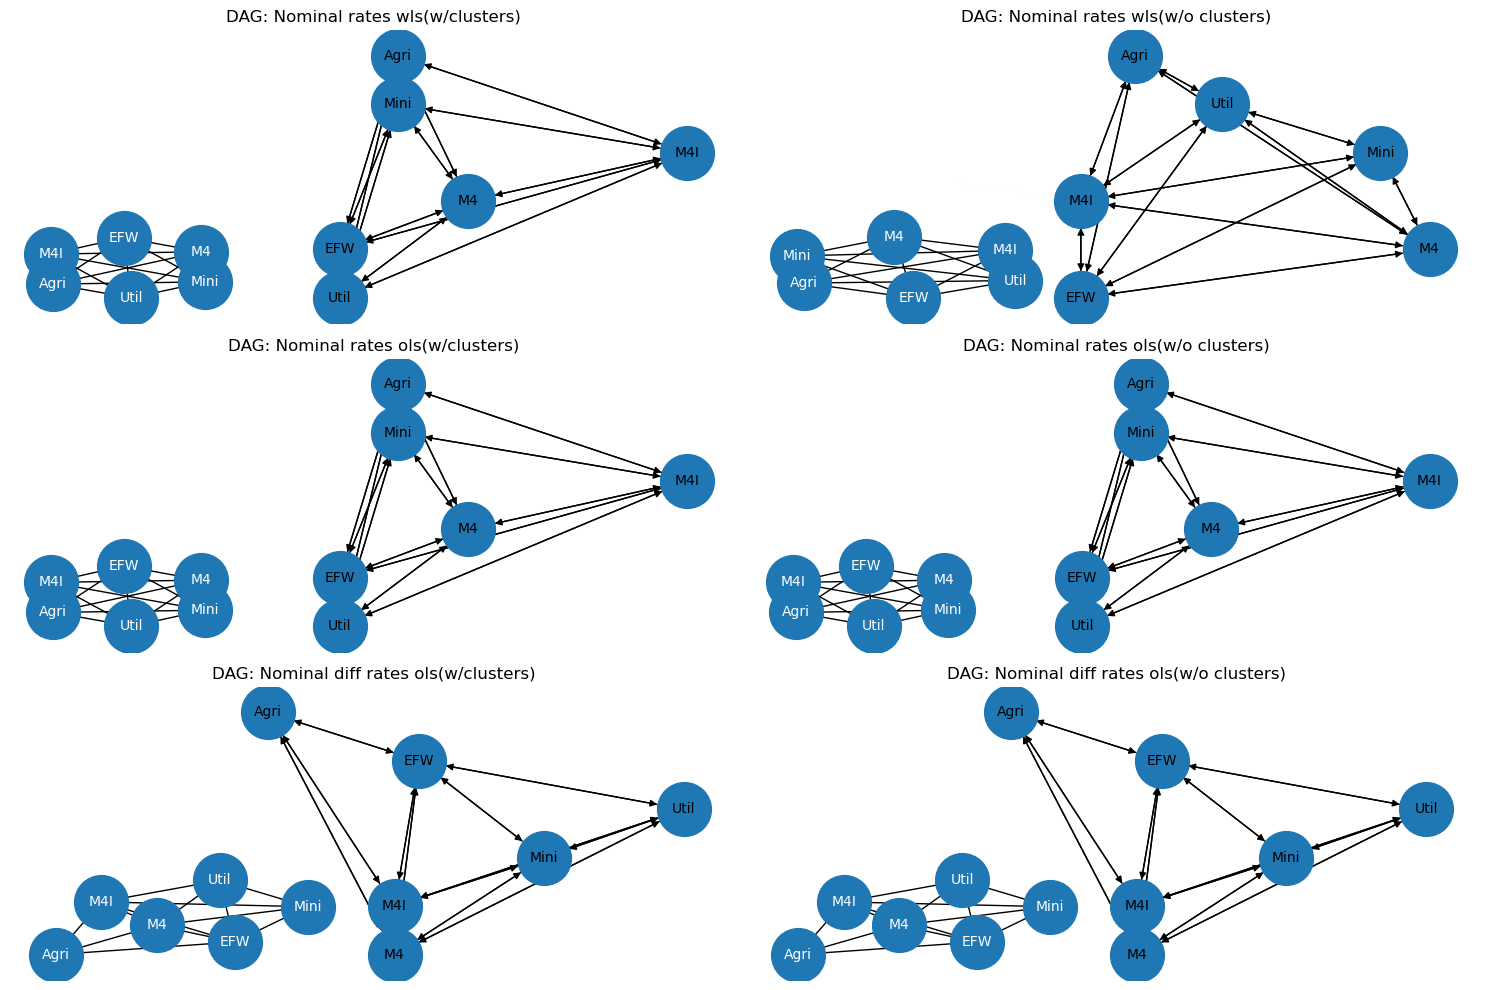

In [33]:
from abiFunctions import build_skeleton, graph_undirected_DAG, convert_to_directed, plot_dag_for_dataframe
from abiFunctions import plot_dags_in_grid

# Create dictionary for plotting DAGs
dag_dict = {
    'Nominal rates wls(w/clusters)': residuals_df_dict['Nominal rates wls(w/clusters)'],
    'Nominal rates wls(w/o clusters)': residuals_df_dict['Nominal rates wls(w/o clusters)'],
    'Nominal rates ols(w/clusters)': residuals_df_dict['Nominal rates ols(w/clusters)'],
    'Nominal rates ols(w/o clusters)': residuals_df_dict['Nominal rates ols(w/o clusters)'],
    'Nominal diff rates ols(w/clusters)': residuals_df_dict['Nominal diff rates ols(w/clusters)'],
    'Nominal diff rates ols(w/o clusters)': residuals_df_dict['Nominal diff rates ols(w/o clusters)']
}

plot_dags_in_grid(dag_dict, exclude_columns=['clusters_2.0', 'clusters_3.0', 'clusters_4.0'])
